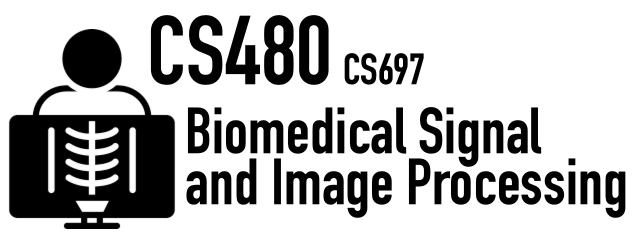
#Assignment 2

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

In [5]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

from mne.channels import combine_channels

from mne.evoked import combine_evoked

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [6]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')

Opening raw data file C:\Users\thucd\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** How many EEG channels were used when acquiring the data? [15 Points]


In [ ]:
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

In [7]:
n_channel = len(raw.ch_names)
print(n_channel)

376


* There are in total of 376 collection of channels

**Task 2:** Let's look at some channels! [20 Points]

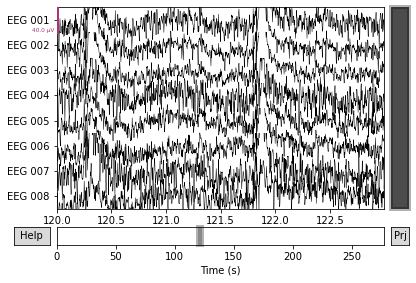

In [8]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [9]:
# TODO please plot EEG channels 50-60 for 1 second after 200 seconds.

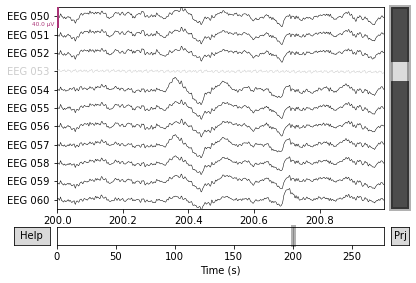

In [10]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 
        'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs, start=200, duration=1)

**Task 3:** How long between event and brain activity? [30 Points]

[312]


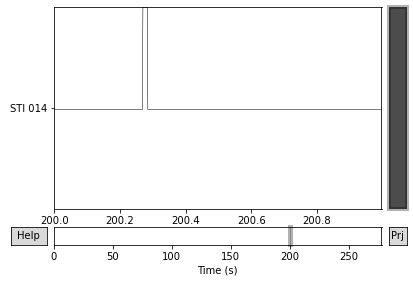

In [11]:
# the following code plots the stimulus channel for the same time
chan_idxs1 = [raw.ch_names.index('STI 014')]
print(chan_idxs1[0:])
stim = raw.plot(order=chan_idxs1, start=200, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

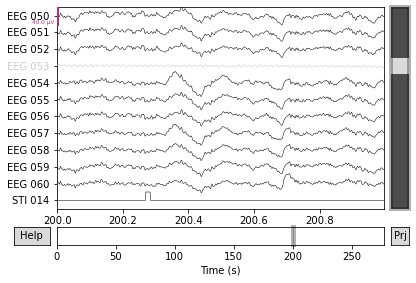

In [12]:
# list of EEG channels 50-60
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 
        'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']

# append to the stimulus channel
chs.append('STI 014')
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=200, duration=1)


In [ ]:
# TODO Please estimate the time between stimulus and brain activity.
# TODO: YOUR ANSWER

** Estimation **
* As displayed on the graph of EEG 50-60, the highest peak is shown in the EEG-054, the number is roughly 200.36 secs after 200 seconds.
* About 200.25 secs after 200 secs, the number of seconds is represented as peaking for stimilus 014 channel.
* Therefore, the estimation between stimulus and brain activity are 200.36 - 200.25 = 0.11 secs


**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [13]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4,
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


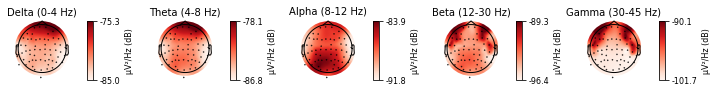

In [14]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


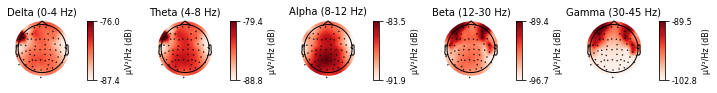

In [15]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


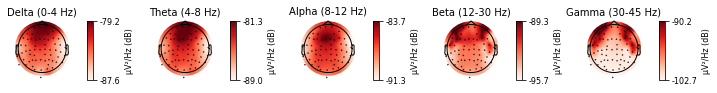

In [16]:
button_activity = epochs['button'].plot_psd_topomap()

In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

* The most common and equivalent brain scanning to the three activities, including visual/right, face, and pressing button, is having Beta and Gamma stimuli pretty much the same by looking at visualization and the approximation of numbers
* The differences are displayed clearly in the Delta, Theta and Alpha of each individuals.
* For instance, The Delta and Gamma stimuli of the Face activity is covered with red area on the left side of the brain. While, pressing button activity is widely covered on the front side.
* Furthermore, the Alpha stimuli is also displayed the brain analysis differently when comparing between visual/right and button activity. 
* However, the visualizations have shown a bit similarities between Delta and Theta stimuli of visual/right and button activities.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event type happened?

In [26]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5,
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


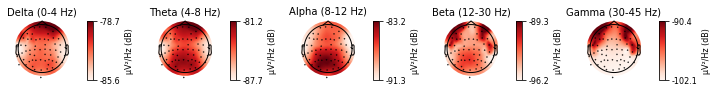

    Using multitaper spectrum estimation with 7 DPSS windows


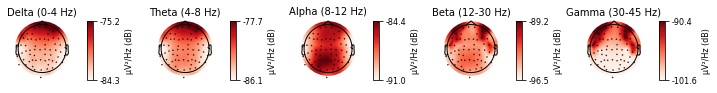

    Using multitaper spectrum estimation with 7 DPSS windows


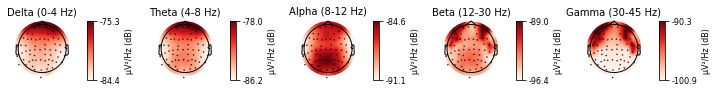

In [17]:
# Display the remaining of activities:

# here we see the average localized brain activity for the left visual stimuli
left_visual_activity = epochs['visual/left'].plot_psd_topomap()
# here we see the average localized brain activity for the left auditory stimuli
left_audio_activity = epochs['auditory/left'].plot_psd_topomap()
# here we see the average localized brain activity for the right auditory stimuli
right_audio_activity = epochs['auditory/right'].plot_psd_topomap()

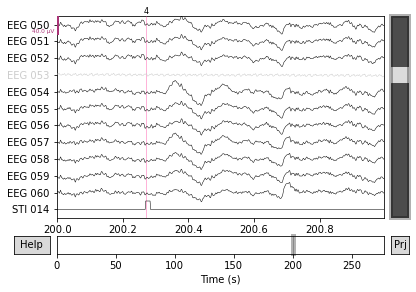

In [29]:
chan_idxs_trace = raw.plot(order=chan_idxs, start=200, 
                           duration=1, events=events,
                           event_color= {
                               1: 'chocolate', 
                               2: 'darksalmon',
                               3: 'navy', 
                               4: 'hotpink', 
                               5: 'saddlebrown', 
                               32: 'gold' }
                          )

** Therefore, the brain activity as shown on the line pointed out the number 4, is visual/right brain stimuli **

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#